In [41]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
from matplotlib import pyplot as plt, dates
import datetime

In [29]:
cnty_df = pd.read_csv('us-counties.csv')
cnty_df.date = pd.to_datetime(cnty_df.date,format='%Y-%m-%d')

In [30]:
utah_mask = cnty_df.state == 'Utah'
salt_lake_mask = cnty_df.county == 'Salt Lake'
utah_cnty_mask = cnty_df.county == 'Utah'
utah_cnty_df = cnty_df[utah_cnty_mask]
salt_cnty_df = cnty_df[salt_lake_mask]
utah_st_df = cnty_df[utah_mask]

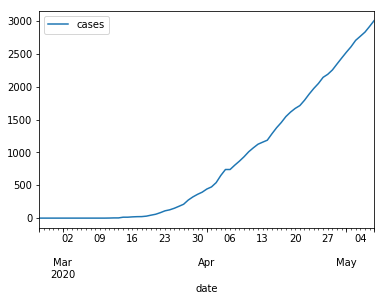

In [71]:
salt_cnty_df.plot(x='date',y='cases')
plt.show()

/home/ethan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ethan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


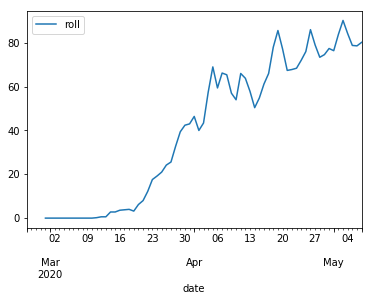

In [73]:
salt_cnty_df['new_cases'] = np.hstack([np.array([0]), np.diff(salt_cnty_df.cases.values)])
salt_cnty_df['roll'] = salt_cnty_df.new_cases.rolling(window=5).mean()
salt_cnty_df.plot(x='date',y='roll')
plt.show()

In [75]:
len(np.diff(salt_cnty_df.cases))

72

In [76]:
salt_cnty_df

,date,county,state,fips,cases,deaths,new_cases,roll
310,2020-02-25,Salt Lake,Utah,49035.0,1,0,0,NaN
330,2020-02-26,Salt Lake,Utah,49035.0,1,0,0,NaN
350,2020-02-27,Salt Lake,Utah,49035.0,1,0,0,NaN
371,2020-02-28,Salt Lake,Utah,49035.0,1,0,0,NaN
393,2020-02-29,Salt Lake,Utah,49035.0,1,0,0,0.0
420,2020-03-01,Salt Lake,Utah,49035.0,1,0,0,0.0
452,2020-03-02,Salt Lake,Utah,49035.0,1,0,0,0.0
487,2020-03-03,Salt Lake,Utah,49035.0,1,0,0,0.0
525,2020-03-04,Salt Lake,Utah,49035.0,1,0,0,0.0
574,2020-03-05,Salt Lake,Utah,49035.0,1,0,0,0.0
